In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.linalg import svd

Image shape (original): (768, 1024, 3)
Image shape (grayscale): (768, 1024)
k=200 → info retained = 99.93%
k=175 → info retained = 99.90%


/var/folders/ds/qgc7ldz113jb3ym8xw9kxxmh0000gn/T/ipykernel_99747/807278728.py:19: RuntimeWarning: divide by zero encountered in matmul
  A_k = U_k @ S_k @ V_k
/var/folders/ds/qgc7ldz113jb3ym8xw9kxxmh0000gn/T/ipykernel_99747/807278728.py:19: RuntimeWarning: overflow encountered in matmul
  A_k = U_k @ S_k @ V_k
/var/folders/ds/qgc7ldz113jb3ym8xw9kxxmh0000gn/T/ipykernel_99747/807278728.py:19: RuntimeWarning: invalid value encountered in matmul
  A_k = U_k @ S_k @ V_k


k=150 → info retained = 99.86%
k=125 → info retained = 99.80%
k=100 → info retained = 99.70%
k=75 → info retained = 99.53%
k=50 → info retained = 99.18%
k=25 → info retained = 98.24%


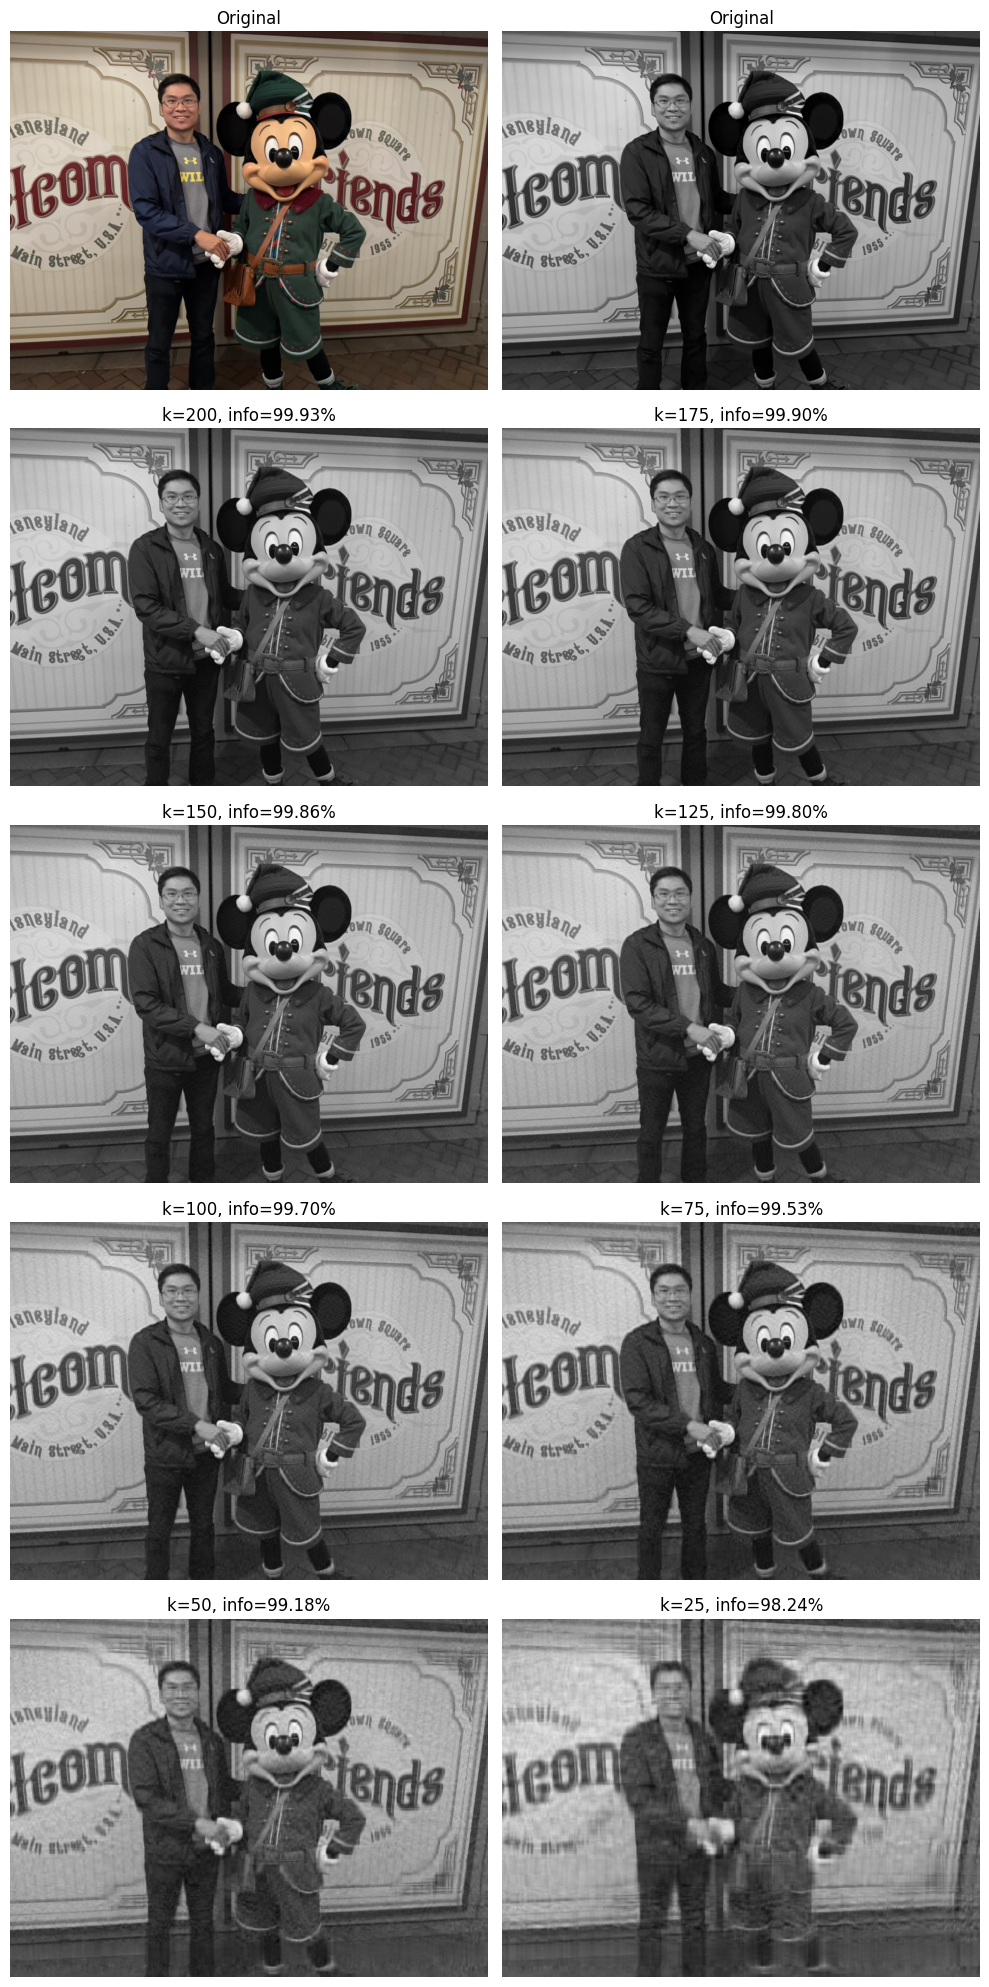

In [83]:
# Step 2: Load image
img = Image.open("khang_mickey.jpeg")
A = np.array(img)
print("Image shape (original):", A.shape)

# Step 3: Convert to grayscale
A_grey = A.dot([0.299, 0.587, 0.114])
print("Image shape (grayscale):", A_grey.shape)


# Step 4: Function: truncated SVD
def truncated_svd(A, k):
    U, S, Vt = svd(A, full_matrices=False)
    U_k = U[:, :k]
    S_k = np.diag(S[:k])
    V_k = Vt[:k, :]

    # Step 5: Compute compressed image from SVD components
    A_k = U_k @ S_k @ V_k

    # Step 6: find information retained
    info_retained = (np.sum(S[:k] ** 2) / np.sum(S**2)) * 100
    return A_k, info_retained


k_values = np.arange(200, 0, -25)
compressed_images = {}
info_ratios = {}

for k in k_values:
    A_k, info_retained = truncated_svd(A_grey, k)
    compressed_images[k] = A_k
    info_ratios[k] = info_retained
    print(f"k={k} → info retained = {info_retained:.2f}%")

# Step 7: Show original vs compressed
plt.figure(figsize=(10, 20))

plt.subplot(5, 2, 1)
plt.imshow(A)
plt.title("Original")
plt.axis("off")

plt.subplot(5, 2, 2)
plt.imshow(A_grey, cmap="gray")
plt.title("Original")
plt.axis("off")

for i, k in enumerate(k_values, start=3):
    plt.subplot(5, 2, i)
    plt.imshow(compressed_images[k], cmap="gray")
    plt.title(f"k={k}, info={info_ratios[k]:.2f}%")
    plt.axis("off")


plt.tight_layout()
plt.show()